In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Lagrange Interpolation

In [12]:
class Lagrange:
    def __init__(self, data_x, data_y):
        self.data_x = data_x
        self.data_y = data_y
        self.degree = len(self.data_x) - 1
    
    def l_k(self, k, x):
        l_k = 1
        x_k = self.data_x[k]
        for i in range(self.degree + 1):
            if i != k:
                l_k *= (x - self.data_x[i])/(x_k - self.data_x[i])
        return l_k
    
    def __call__(self, x_arr):
        p_x_arr = []
        for i in range(len(x_arr)):
            p_x = 0
            for k in range(self.degree + 1):
                p_x += self.l_k(k, x_arr[i])*data_y[k]
            p_x_arr.append(p_x)
        return p_x_arr

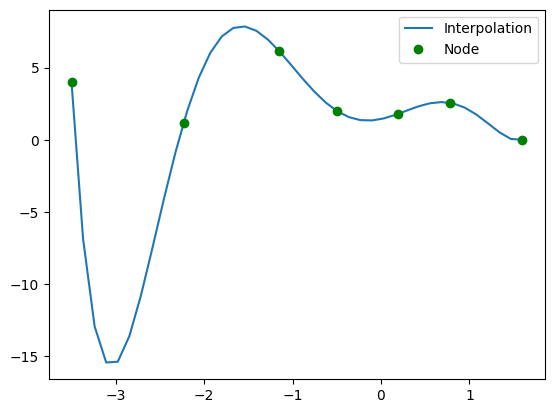

In [15]:
data_x = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p = Lagrange(data_x, data_y)

x_arr = np.linspace(-3.5, 1.6, 40)
y_arr = p(x_arr)

plt.plot(x_arr, y_arr)
plt.plot(data_x, data_y, 'go')
plt.legend(['Interpolation', 'Node'])

In [20]:
def f(x):
    return 0.5*x**2 - x + 3

data_x = [1, 4, 6, 8]
data_y = [3, 5, 8, 14]
p = Lagrange(data_x, data_y)

x_vals = np.arange(3, 10)
y_vals = p(x_vals)

total_error = 0
for i in range(len(x_vals)):
    error = abs(f(x_vals[i]) - p([x_vals[i]]))
    print(f"For P({x_vals[i]}) = {error}")
    total_error += error

print(total_error/len(x_vals))

For P(3) = [0.32142857]
For P(4) = [2.]
For P(5) = [4.28571429]
For P(6) = [7.]
For P(7) = [9.96428571]
For P(8) = [13.]
For P(9) = [15.92857143]
[7.5]
